In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Métodos Iterativos

Supongamos que queremos resolver $Ax=b$ , pero la matriz $A$ es difícil de invertir. Además, por otro lado, es un problema mal condicionado, debido a las limitaciones de la aritmética de punto flotante (problemas derivados de la representación finita de números reales).

Es por eso que proponemos $A = B + C$ con $B$ fácil de invertir. Luego $x$ es solución de:

$(B+C)x = b$

$Bx + Cx = b$

$Bx = -Cx + b$

$x = \underbrace{-B^{-1}C}_Mx + B^{-1}b \quad $ donde $M$ se la conoce como la matriz de iteración del método.

Podemos pensar que $F(x) = Mx + B^{-1}b$, y que la solución de $Ax = b$ es un punto fijo de $F$.

La idea es tomar un $x_0$ inicial e iterar $x^{(n+1)} = Mx^{(n)} + B^{-1}b$ con la expectativa de que $x^{(k)} \rightarrow x$

$\begin{array}{rl}
\text{Iteración: } x^{(n+1)} = Mx^{(n)} + B^{-1}b \\
\text{Ecuación que se cumple: } x = Mx + B^{-1}b
\end{array}
\quad
\left.\begin{array}{c}
\vphantom{x^{(n+1)} = Mx^{(n)} + B^{-1}b} \\
\vphantom{x = Mx + B^{-1}b}
\end{array}\right\}
\quad \text{Calculamos la diferencia}$

\


$x^{(n+1)} - x = Mx^{(n)} - Mx + B^{-1}b - B^{-1}b$

$x^{(n+1)} - x = Mx^{(n)} - Mx$

$x^{(n+1)} - x = M(x^{(n)} - x)$

Llamando $e^{(n)} = x^{(n)} - x$ el error en la n-ésima iteración, entonces:

$e^{(n+1)} = Me^{(n)}$

Pero, además, $e^{(n+1)} = Me^{(n)} = M(Me^{(n-1)}) = ... = M^{n+1}e^{(0)}$.

Luego, como $e^{(n+1)} = M^{n+1}e^{(0)}$, en particular sus normas son equivalentes. Por lo tanto:

$||e^{(n+1)}|| = ||M^{n+1}e^{(0)}|| \ $ y aplicando desigualdades de normas: $||e^{(n+1)}|| \leq ||M||^{n+1}||e^{(0)}||$

Esto implica que, un método convergerá para todo estado incial $x_0$(es decir, error tiende a anularse, $e^k \rightarrow 0$) si y solo si existe una norma inducida tal que $||M||< 1$.

\
$Teorema:$ $A \in \mathbb{R}^{n \times n} \rightarrow \rho(M) = inf \{||M|| \ / \ ||\ .|| \ \text{norma inducida}\}$

$Corolario:$ un método de la forma $x^{(n+1)} = Mx^{(n)} + B^{-1}b$ converge $\forall x_0 \iff \rho(M) < 1$.

Y, como $\rho(M) = max\{ |\lambda| \ /  \ \lambda \text{ autovalor de } M \}$, eso implica que el método convergerá si y solo si la matriz de iteración $M$ no posee autovalores de módulo mayor a uno.

Para el cálculo de los autovalores de la matriz de iteración, podría resultar conveniente la siguiente propiedad:

$Propiedad: M = -B^{-1}C $ matriz de iteración \
$\hspace{3cm} \lambda $ autovalor de $M \iff det(\lambda B + C) = 0$

Es decir, $\lambda$ debe ser raíz del polinomio $det(\lambda B + C)$.

\

Por otro lado, si se cuenta con más de un método iterativo, una opción para decantar entre la utilización de uno u otro, es analizar la velocidad de convergencia del método: mientras menor sea el radio espectral de la matriz de iteración, más rápidamente el error tiende a anularse para un $x_0$ general (resultado comprobable tras evaluación de la ecuación del error presentada).

\

### **Métodos iterativos particulares**


$1) \ Richardson: $ $ \ B = w^{-1}I$ ,  $\ \ C = A - w^{-1}I$, $ \ w \in \mathbb{R}_{\neq 0}$ \
$\hspace{3cm} x^{(n+1)} = -(Aw - I)x^{(n)} + wb$ \
Matriz de iteración del método: $\ M = I -Aw$

\

Para los siguientes métodos, tomamos $A = D + L + U$.

$2) \ Jacobi: $ $B = D = diag(A)$, $\ C = A-D$. \
$\hspace{2.3cm} x^{(n+1)} = -D^{-1}(L+U)x^{(n)} + D^{-1}b$ \
Matriz de iteración del método: $\ M_J = -D^{-1}(L+U)$

\

$3) \ Gauss-Seidel: $ $\ B = D+L$, $\ C = U$. \
$\hspace{3cm} x^{(n+1)} = -(D+L)^{-1}Ux^{(n)} + (D+L)^{-1}b$ \
Matriz de iteración del método: $\ M_{GS} = -(D+L)^{-1}U$

\

***Resultados*** \
- $ A $ es EDD $\rightarrow $ Jacobi, GS convergen
- $ A $ simétrica y definida positiva $\rightarrow $ GS converge.
- $ A $ es tridiagonal $\rightarrow $ vale $\rho(M_{GS}) = \rho(M_j)^2$
  - Si Jacobi converge $\rightarrow $ GS también (y más rápido)
  - Si Jacobi no converge $\rightarrow $ GS tampoco (y diverge más rápido)



### Ejercicios métodos iterativos

**Ejercicio**: se desea resolver el sistema $Ax=b$ para un $b∈\mathbb{R}^3$ y $A =  \begin{bmatrix}1 & 0 & \alpha \\
 1 & 1 & 0 \\
 -1 & 1 & 1 \end{bmatrix} \ $ con $\alpha \in \mathbb{R}$. \

a) Determinar los valores de $\alpha$ para los cuales el método de Gauss-Seidel converge para cualquier vector inicial $x_0$.

b) Probar que si $\alpha = 0$ el método de Jacobi converge en 3 pasos para cualquier $x_0$.

\

***Resolución***

$a)$ El método iterativo GS propone descomponer $A = \underbrace{D + L}_B + \underbrace{U}_C$\
Y la iteración resultante es: $x^{(n+1)} = \underbrace{-(D+L)^{-1}U}_{M_{GS}}x^{(n)} + (D + L)^{-1}b$

Por teorema, el método iterativo converge para todo vector inicial $x_0$ si y solo si $\rho(M_{GS}) < 1$ , pues busco que exista $|| \ .||$ norma inducida tal que $||M|| < 1$ (pues, de esta forma, el error $||e^{(n+1)}|| \leq ||M||^{n+1}||e^{(0)}|| \rightarrow 0 \ $ tiende a anularse), y vale que $\rho(M_{GS}) = inf \{ ||M|| \ / \ || \ . || \text{norma inducida} \}$.

Es por eso que, usando la propiedad: $M = -B^{-1}C$\
$\hspace{7cm}\lambda$ autovalor de $M_ \iff \det(B\lambda + C) = 0$

Calculo los autovalores de $M_{GS}$ (pues $\rho(M_{GS}) = \{|\lambda| \ / \ \lambda \text{ autovalor de }M_{GS} \}$)

$B = \begin{bmatrix} 1 & 0 & 0 \\
 1 & 1 & 0 \\
 -1 & 1 & 1 \end{bmatrix}$, $\ C = \begin{bmatrix} 0 & 0 & \alpha \\
 0 & 0 & 0 \\
 0 & 0 & 0 \end{bmatrix}$

$\Rightarrow det(\lambda B + C) = det(\begin{bmatrix} \lambda & 0 & \alpha \\
 \lambda & \lambda & 0 \\
 -\lambda & \lambda & \lambda \end{bmatrix}) = \lambda \begin{vmatrix}
\lambda & 0 \\
\lambda & \lambda
\end{vmatrix} + \alpha \begin{vmatrix}
\lambda & \lambda \\
-\lambda & \lambda
\end{vmatrix} = \lambda^3 + 2\alpha\lambda^2 = \lambda^2(\lambda + 2\alpha)$

$\therefore \ $ Los autovalores de $M_{GS}$ son $\lambda_{1,2} = 0, \  \lambda_3 = -2\alpha$

Luego, eso implica que $\rho(M_{GS}) = max \{ 0, |2\alpha| \} = 2|\alpha| \ \ $ (pues $|2\alpha| \geq 0 \ \forall \alpha$)

$\Rightarrow$ el método GS converge para todo vector inicial $x_0$ si y solo si $\rho(P_{GS}) < 1 \iff |\alpha| < \frac{1}{2}$.

\

$b) \ \alpha = 0 \rightarrow A = \begin{bmatrix}1 & 0 & 0 \\
 1 & 1 & 0 \\
 -1 & 1 & 1 \end{bmatrix}$

El método iterativo Jacobi propone la descomposición $A = \underbrace{D}_B + \underbrace{L + U}_C$

Y la iteración resultante: $x^{(n+1)} = \underbrace{-D^{-1}(L +U)}_{M_{J}}x^{(n)} + D^{-1}b$

Queremos ver que $\forall x_0$, el método converge en tres pasos. \
Luego, teniendo en cuenta la ecuación del error: $e^{(n+1)} = M_J^{n+1}e^{(0)}$, una posible estrategia es ver qué ocurre con $M_J^3$.

O sea, planteamos el error en la tercera iteración como $e^{(3)} = M_J^3e^{(0)}$, y averiguamos la matriz que resulta de realizar $M_J^3$.

$M_J = -B^{-1}C = -D^{-1}(L+U) = -I^{-1}(L+U) = -I(L+U) = \begin{bmatrix}0 & 0 & 0 \\
 -1 & 0 & 0 \\
 1 & -1 & 0 \end{bmatrix}$

Acá se podría usar el siguiente resultado: sea $T \in \mathbb{K}^{n \times n}$ estrictamente triangular superior/inferior $\rightarrow T^n =
\begin{bmatrix}
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{bmatrix}$

De igual forma, en cuentas, en este ejemplo particular, es fácil calcular que así será: \
$M_J^3 = M_JM_JM_J = \begin{bmatrix}0 & 0 & 0 \\
 -1 & 0 & 0 \\
 1 & -1 & 0 \end{bmatrix} \begin{bmatrix}0 & 0 & 0 \\
 -1 & 0 & 0 \\
 1 & -1 & 0 \end{bmatrix} \begin{bmatrix}0 & 0 & 0 \\
 -1 & 0 & 0 \\
 1 & -1 & 0 \end{bmatrix} = \begin{bmatrix}0 & 0 & 0 \\
 0 & 0 & 0 \\
 1 & 0 & 0 \end{bmatrix} \begin{bmatrix}0 & 0 & 0 \\
 -1 & 0 & 0 \\
 1 & -1 & 0 \end{bmatrix} = \begin{bmatrix}0 & 0 & 0 \\
 0 & 0 & 0 \\
 0 & 0 & 0 \end{bmatrix}$

\

$\therefore \ e^{(3)} = M_J^3e^{(0)} = \begin{bmatrix}0 & 0 & 0 \\
 0 & 0 & 0 \\
 0 & 0 & 0 \end{bmatrix} e^{(0)} = \vec{0} \quad \Rightarrow $ el método converge en tres pasos $\forall x_0$

$\hspace{18cm} \huge\boxtimes$

**Ejercicio**: sea $A$ una matriz cuadrada cuya diagonal es la identidad. \
  a) Sea $B_J$ la matriz asociada al método de Jacobi. Para cada $w > 0$ se define la relajación \
$\hspace{6.5cm} B_w = wB_J + (1-w)I$ \
Probar que $Ax = b$ si y solo si \
$\hspace{7cm} x = B_wx + wb$

b) Sea $A = \begin{bmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1 \end{bmatrix}$ y el método iterativo $x^{(k+1)} = B_wx^{(k)} + wb.$ \
  - (i) Dar los valores de $w$ para los cuales el método converge.
  - (ii) ¿Qué valores de $w$ aseguran que el método planteado converge más rápido que el de Jacobi?

***Resolución***

\

$a)$ Se quiere probar que $Ax = b \iff x = B_wx + wb \quad$ donde $B_w = wB_J + (1-w)I \quad$ con $w > 0$.

Tomando $A = \underbrace{D}_I + L + U \quad$ entonces $B_J = -D^{-1}(L+U) = -I(L+U) = -L -U$.

Luego, reemplazando $B_J = -L -U \ $ en $ \ B_w = wB_J + (1-w)I$, se obtiene

$B_w = -w(L+U) + (1-w)I = -wL -wU + I -wI = I-w\underbrace{(L + U + I)}_A = I -wA$ \
O sea: $B_w = I - wA$

Despejo $A$:

$-(B_w - I)\frac{1}{w} = A$

\

Si se reemplaza este resultado en la ecuación $Ax = b$, se desprende la siguiente cadena de equivalencias:

$-(B_w -I)\frac{1}{w}x = b$

$-B_wx + Ix = wb$

$x = B_wx + wb \quad $.

$\therefore \ Ax = b \iff x = B_wx + wb \quad$ como se quería probar.

$\hspace{16cm} \huge\boxtimes$

$b_i) \ A = \begin{bmatrix} 1 & \frac{1}{2} \\ \frac{1}{2} & 1\end{bmatrix}$

$B_w = I -wA$ la matriz de iteración del método

Para que el método converga, debe existir $|| \ . || $ norma inducida tal que $||B_w|| < 1$ pues, viendo la ecuación del error:

$e^{(n+1)} = B_w^{n+1}e^{(0)}$

Luego, sus normas son equivalentes: $||e^{(n+1)}|| = ||B_w^{n+1}e^{(0)}|| $

Y, usando desigualdades de normas, $||e^{(n+1)}|| \leq ||B_w||^{n+1}||e^{(0)}|| $

Pues: $||B^nx|| \leq ||B^n||||x|| \leq ||B||^n||x||$

Entonces, eso significa que si existe norma inducida tal que $||B_w|| < 1$, entonces $e^{(n+1)} \rightarrow 0$

Por teorema, se sabe que $\rho (B_w) = inf\{ ||B_w|| \ / \ || \ .|| $norma inducida$\}$

Luego, buscamos ver qué valores de $w$ hacen que la matriz $B_w$ tenga autovalores de módulo menor (estricto) a 1 (pues $\rho(B_w) = \{ |\lambda| \ / \ \lambda$ autovalor de $B_w \}$).

Buscamos autovalores de $B_w$

$B_w = I - wA = \begin{bmatrix} 1 - w & -\frac{w}{2} \\ -\frac{w}{2} & 1 - w \end{bmatrix}$


Para el cálculo de autovalores, debemos hallar las raíces de $det(B_w - \lambda I)$

$det(B_w - \lambda I) = det(\begin{bmatrix} 1 - w - \lambda & -\frac{w}{2} \\ -\frac{w}{2} & 1 - w -\lambda \end{bmatrix})$

$(1 - w - \lambda)^2 - \frac{w^2}{4} $

$(1-w)^2 -2\lambda (1-w) + \lambda^2 - \frac{w^2}{4}$

$\lambda^2 - 2(1-w)\lambda + w^2 - 2w + 1 - \frac{w^2}{4}$

$\lambda^2 - 2(1-w)\lambda + \frac{3w^2}{4} - 2w + 1$

$\lambda^2 - 2(1-w)\lambda + \frac{3w^2 -8w + 4}{4}$

Veo la resolvente:

$\frac{2(1-w) +- \sqrt{4(1-w)^2 - (3w^2 - 8w + 4)}}{2}$

$\frac{2(1-w) +- \sqrt{4w^2 -8w + 4 - 3w^2 + 8w - 4)}}{2}$

$\frac{2(1-w) +- \sqrt{w^2}}{2} \quad$ con $w > 0$

$\frac{2(1-w) +- w}{2}$

Por lo tanto, mis autovalores son:

$\lambda_1 = \frac{2-w}{2} \quad , \lambda_2 = \frac{2-3w}{2}$

Luego, $\rho(B_w) = max \{ |\frac{2-w}{2}| , |\frac{2-3w}{2}|\}$

A simple vista no puedo determinar cuál presenta mayor módulo. Es entonces que mi estrategia es ver para qué valores los módulos son menores a uno; y luego graficar para ver finalmente el intervalo de $w$ con el cual se consigue la convergencia del método.

$|\frac{2-w}{2}| < 1 \iff -1 < \frac{2-w}{2} < 1 \iff -2 < 2-w < 2 \iff w \in (0,4)$

$|\frac{2-3w}{2}| < 1 \iff -1 < \frac{2-3w}{2} < 1 \iff -2 < 2-3w < 2 \iff w \in (0, \frac{4}{3})$

Ahora, grafico los módulos en sus respectivos intervalos:


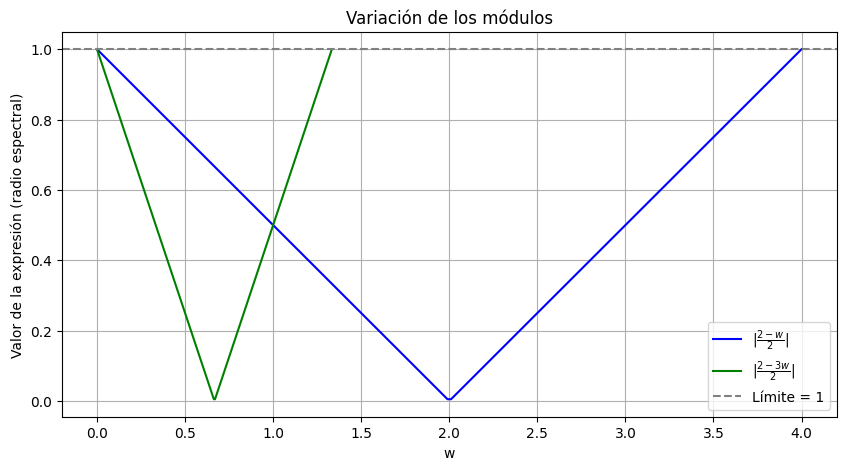

In [ ]:
# Valores de w para cada condición
w1 = np.linspace(0, 4, 200)
y1 = np.abs((2 - w1) / 2)

w2 = np.linspace(0, 4/3, 200)
y2 = np.abs((2 - 3*w2) / 2)

# Grafico
plt.figure(figsize=(10,5))

plt.plot(w1, y1, label=r'$| \frac{2 - w}{2} |$', color='blue')
plt.plot(w2, y2, label=r'$| \frac{2 - 3w}{2} |$', color='green')

# Grafico y = 1 como referencia
plt.axhline(1, color='gray', linestyle='--', label='Límite = 1')

plt.xlabel('w')
plt.ylabel('Valor de la expresión (radio espectral)')
plt.title('Variación de los módulos')
plt.legend()
plt.grid(True)
plt.show()


Gracias al gráfico, podemos observar que $\rho(B_w) < 1 \iff w \in (0, \frac{4}{3})$

Es decir, el método converge $\forall x_0 \iff w \in (0, \frac{4}{3})$.

$b_{ii})$ Un método convergerá más que otro si su radio espectral es más chico. Esto se debe a que, retomando:

$||e^{(n+1)}|| \leq ||B||^{n+1} ||e^{(0)}||$

Y tomando $ || \ . || $ norma inducida$\ /  \ \ ||B|| = \rho(B)$

$||e^{(n+1)}|| \leq \rho(B)^{n+1} ||e^{(0)}|| \quad$ esto implica que mientras más chico sea $\rho(B)$, más rápido $e^{(n+1)} \rightarrow 0$

Luego, calculo $B_J$ y comparo radios espectrales.

$B_J = -D^{-1}(L+U) = \begin{bmatrix} 0 & -\frac{1}{2} \\ -\frac{1}{2} & 0 \end{bmatrix}$

$\lambda$ autovalor de $B_J \iff det(B_J -\lambda I) = 0$

$det(B_J - \lambda I) = det (\begin{bmatrix} -\lambda & -\frac{1}{2} \\ -\frac{1}{2} & -\lambda \end{bmatrix}) = \lambda^2 - \frac{1}{4} = (\lambda - \frac{1}{2})(\lambda + \frac{1}{2})$

$\therefore \ \rho(B_J) = \frac{1}{2}$


Es por eso que, si quiero que el método propuesto por el ejercicio converja más rápido que el método de Jacobi en la matriz $A$, debo hallar los $w$ tal que $\rho(B_w) < \frac{1}{2}$.

Para determinar los $w$ que cumplen, primero busco el valor del radio espectral para que cada módulo no supere $\frac{1}{2}$ (tengo en cuenta que $w>0$) .

$|\frac{2-w}{2}| < \frac{1}{2} \iff -\frac{1}{2} < \frac{2-w}{2} < \frac{1}{2} \iff -1 < 2-w < 1 \iff w \in (1,3) \quad$

$|\frac{2-3w}{2}| < \frac{1}{2} \iff -\frac{1}{2} < \frac{2-3w}{2} < \frac{1}{2} \iff -1 < 2-3w < 1 \iff w \in (\frac{1}{3}, 1)$



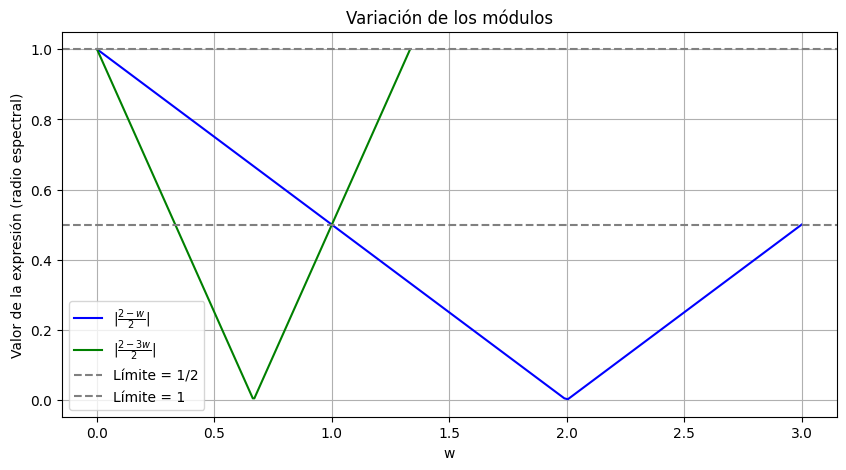

In [ ]:
# Valores de w para cada condición
w1 = np.linspace(0, 3, 200)
y1 = np.abs((2 - w1) / 2)

w2 = np.linspace(0, 4/3, 200)
y2 = np.abs((2 - 3*w2) / 2)

# Grafico
plt.figure(figsize=(10,5))

plt.plot(w1, y1, label=r'$| \frac{2 - w}{2} |$', color='blue')
plt.plot(w2, y2, label=r'$| \frac{2 - 3w}{2} |$', color='green')

# Grafico y = 1/2 e y = 1 como referencia
plt.axhline(1/2, color='gray', linestyle='--', label='Límite = 1/2')
plt.axhline(1, color='gray', linestyle='--', label='Límite = 1')

plt.xlabel('w')
plt.ylabel('Valor de la expresión (radio espectral)')
plt.title('Variación de los módulos')
plt.legend()
plt.grid(True)
plt.show()

Luego, se puede ver que el método no converge más rápido qe el de Jacobi para ningún $w$, aunque vale aclarar que si $w = 1$, para ambos métodos su radio espectral vale $\frac{1}{2}$.